In [1]:
#BIBLIOTEKI
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as st
from math import sqrt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math
from numpy.linalg import eig
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

Zmienna zależna:
- parametr logK HSA

Zmienne niezależne:
- logK CTAB
- CATS3D_09_AL 
- CATS3D_00_AA 
- CATS 3D_00_DD 

In [2]:
data = pd.read_excel(r'dane_leki.xlsx')
data = data.drop('Unnamed: 0',axis = 1)

data.drop('Zbiór', inplace=True, axis=1)

nazwy = data['Nazwa']
data.drop('Nazwa', inplace=True, axis=1)
data = data.set_axis([nazwy])

In [3]:
zmienne_niezalezne = data[['logKCTAB', 'CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']]
zmienne_zalezne = data[['logK HSA']]

zmienne_niezalezne

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
Nazwa,,,,
acetaminophen,-0.63,2,0,2
acetylsalicylic acid,1.22,1,0,4
bromazepam,0.57,1,0,3
carbamazepine,0.68,0,0,3
chlorpromazine,1.50,0,0,2
clonidine,0.26,2,0,1
diazepam,1.25,0,0,3
diltiazem,1.09,0,3,6
diphenhydramine,0.46,0,0,2


In [4]:
pca = PCA()
dane_fitransform = pca.fit_transform(zmienne_niezalezne)
dane_fitransform

array([[-2.30069689, -0.64995536, -0.94942897, -0.77936406],
       [-0.69609081, -0.55355085,  1.0299943 ,  0.6063953 ],
       [-1.49255833, -0.24136433,  0.47664118, -0.01366872],
       [-1.50687237,  0.34610715,  1.25036455, -0.27467546],
       [-2.21652612,  1.10365714,  1.02774028,  0.46380134],
       [-3.00621666,  0.12880242, -1.15630425,  0.02380517],
       [-1.47320989,  0.51879911,  1.37860635,  0.25210567],
       [ 2.73902658,  0.69723128,  1.14828475, -0.19261657],
       [-2.27794539,  0.78857006,  0.79375524, -0.49734319],
       [-2.99927018,  0.8253425 , -0.30158606,  0.0955023 ],
       [-0.25122452,  2.28861872, -1.14814525,  0.42535881],
       [-2.27144912,  0.82189658,  0.81850366, -0.39568367],
       [ 4.92736781,  0.38190869,  1.57836698,  0.08821003],
       [ 0.49504456,  1.7189091 , -0.78602991,  0.25987202],
       [ 0.71154566, -2.7894284 ,  0.60252579, -1.01618963],
       [-0.00564514, -2.73144817, -0.47706652, -0.35865173],
       [-2.24577389, -0.

In [5]:
X_train, X_test,y_train,y_test = train_test_split(dane_fitransform, zmienne_zalezne, test_size=0.33, random_state=42)
dane_kfold = KFold(n_splits=10,shuffle=True, random_state=1)

([<matplotlib.axis.XTick at 0x277b5626a00>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

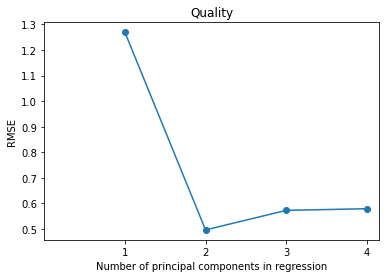

In [6]:
lin_reg = LinearRegression().fit(X_train,y_train)
rmse_list = []

for i in range(1, X_train.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=dane_kfold, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train.shape[1]), np.arange(1, X_train.shape[1]+1))

In [7]:
X_train_pd = pd.DataFrame(X_train, columns = ['logKCTAB','CATS3D_00_DD','CATS3D_09_AL', 'CATS3D_00_AA'])
X_train_pd.head()
X_train_corr = X_train_pd.corr()

values, vectors = eig(X_train_corr)

for i in values:
    print(f'Udział procentowy: {i/4 * 100}%')
    
X_train_corr

Udział procentowy: 35.06491715335797%
Udział procentowy: 27.739088111118658%
Udział procentowy: 18.110980228593103%
Udział procentowy: 19.08501450693028%


,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logKCTAB,1.000000,0.067918,-0.204927,-0.230498
CATS3D_00_DD,0.067918,1.000000,-0.213017,0.040158
CATS3D_09_AL,-0.204927,-0.213017,1.000000,0.079211
CATS3D_00_AA,-0.230498,0.040158,0.079211,1.000000


In [8]:
X_train_corr

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logKCTAB,1.000000,0.067918,-0.204927,-0.230498
CATS3D_00_DD,0.067918,1.000000,-0.213017,0.040158
CATS3D_09_AL,-0.204927,-0.213017,1.000000,0.079211
CATS3D_00_AA,-0.230498,0.040158,0.079211,1.000000


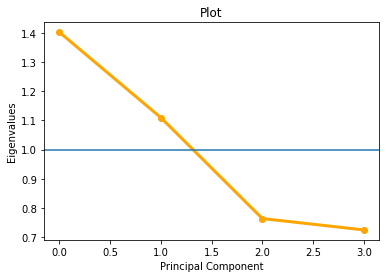

In [9]:
values, vectors = eig(X_train_corr)

values[2], values[3] = values[3],values[2]
vectors[2], vectors[3] = vectors[3],vectors[2]
val = pd.DataFrame(values, columns=['w.wlasne']) 

plt.plot(val, 'o-', linewidth=3, color='orange')
plt.axhline(1)
plt.title('Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [10]:
X = X_train[:,0:2]
Y = y_train
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())

y_pred_pca_train = 0.4406 + 0.0509*X_train[:,0] + (-0.5246 * X_train[:,1])
y_pred_pca_train = pd.DataFrame(y_pred_pca_train)
y_pred_pca_train #predykcyjne pca po treningowych

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     41.44
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           7.77e-07
Time:                        13:31:14   Log-Likelihood:                -11.107
No. Observations:                  18   AIC:                             28.21
Df Residuals:                      15   BIC:                             30.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4406      0.117      3.770      0.0

C:\Users\48512\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,0
0,1.021726
1,0.695562
2,-0.251200
3,0.220014
4,0.491249
5,1.873230
6,-1.499728
7,0.182332
8,0.265072
9,-0.157578


In [11]:
X = X_test[:,0:2]
Y = y_test
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())

y_pred_pca_test = 0.3523 + 0.0790*X_test[:,0] + (-0.6086 * X_test[:,1])
y_pred_pca_test = pd.DataFrame(y_pred_pca_test)
y_pred_pca_test

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     9.823
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0128
Time:                        13:31:14   Log-Likelihood:                -4.7744
No. Observations:                   9   AIC:                             15.55
Df Residuals:                       6   BIC:                             16.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3523      0.172      2.048      0.0

C:\Users\48512\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,0
0,-0.307581
1,-0.654720
2,-0.386946
3,1.933491
4,0.566108
5,-0.327351
6,0.398967
7,1.297186
8,0.509132


In [12]:
lin = LinearRegression()

lin_pca = lin.fit(X_train[:,0:2],y_train)
pred1 = lin_pca.predict(X_train[:,0:2])
pred2 = lin_pca.predict(X_test[:,0:2])

r2 = metrics.r2_score(y_train,pred1)
q2 = metrics.r2_score(y_test,pred2)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred1))
rmse_ex = np.sqrt(metrics.mean_squared_error(y_test,pred2))

In [13]:
r2

0.8467518841419464

In [14]:
q2

0.7324491816116452

In [15]:
rmse

0.4484752129938628

In [16]:
rmse_ex

0.43982404125800406

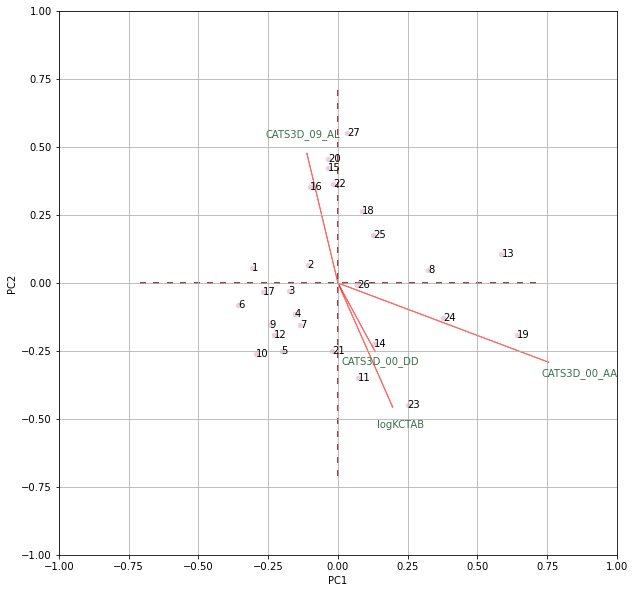

In [17]:

#cos tu srednio wychodzi prawda

list_of_columns = []
for column in data.columns:
    list_of_columns.append(column)

data = pd.read_excel(r'dane_leki.xlsx')
data = data.drop('Unnamed: 0',axis = 1)

data.drop('Zbiór', inplace=True, axis=1)

nazwy = data['Nazwa']
data.drop('Nazwa', inplace=True, axis=1)
data = data.set_axis([nazwy])

y = len(list_of_columns[1:])
X = np.array(data) 
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = 4
    #coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=20,color='#ecd0e2')
    x_coord = xs*scalex
    y_coord = ys*scaley
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#397048', ha = 'center', va = 'center')

    for i in range(0,len(score)):
      plt.text(x_coord[i] + 0, y_coord[i], i+1,color = 'k',ha = 'left', va = 'center',size = 10) #numerki przy punktach

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize = (10,10))
x = np.linspace(start = -0.7,stop = 0.7, num = 30)
plt.scatter(x,[0]*len(x),marker='_',color='maroon')
plt.scatter([0]*len(x),x,marker='|',color='maroon')


myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),list_of_columns[1:]) #PC1 i PC2
plt.show()


In [18]:
np.transpose(pca.components_[0:2, :])

array([[ 0.19507812, -0.45395206],
       [ 0.13227873, -0.25043181],
       [-0.11057641,  0.47386867],
       [ 0.75272132, -0.29067947],
       [ 0.60467374,  0.64974254]])

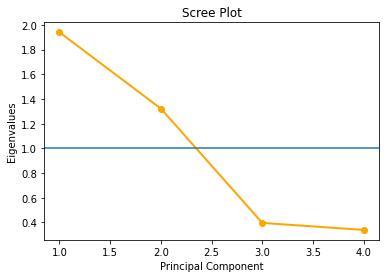

[[1.941]
 [1.323]
 [0.397]
 [0.34 ]]
[[ 0.641 -0.75   0.16  -0.017]
 [-0.609 -0.619 -0.436  0.236]
 [ 0.449  0.232 -0.653  0.564]
 [-0.125  0.003  0.599  0.791]]


In [19]:
list_of_columns = []
for column in data.columns:
    list_of_columns.append(column)

data = pd.read_excel(r'dane_leki.xlsx')
data = data.drop('Unnamed: 0',axis = 1)

data.drop('Zbiór', inplace=True, axis=1)

nazwy = data['Nazwa']
data.drop('Nazwa', inplace=True, axis=1)
data = data.set_axis([nazwy])

data = data[['logKCTAB', 'CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']]

data = pd.DataFrame(data)

macierz_korelacji = data.corr()

list_of_columns = []
for column in data.columns:
    list_of_columns.append(column)
    
#Scree plot napisany ręcznie

values,vectors = eig(macierz_korelacji)
val = pd.DataFrame(values, columns=['w.wlasne']) 
val[:2] 
val = val.sort_values(by='w.wlasne', ascending = False)

valid_vectors = list(vectors)

x = [1,2,3,4]
plt.plot(x,val,'o-', linewidth=2, color='orange')
plt.axhline(1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

val = list(np.around(np.array(val),3))
valid_vectors = list(np.around(np.array(valid_vectors),3))
print(np.array(val))
print(np.array(valid_vectors))

#val - moje wartosci wlasne
#valid_vectors - moje wektory wlasne

In [20]:
vec = pd.DataFrame(valid_vectors[:2])
Pt = vec.transpose()
index = pd.Index(list_of_columns)
Pt = Pt.set_index(index)
Pt = Pt.set_axis(['PC1', 'PC2'], axis=1)
Pt

,PC1,PC2
logKCTAB,0.641,-0.609
CATS3D_00_DD,-0.750,-0.619
CATS3D_09_AL,0.160,-0.436
CATS3D_00_AA,-0.017,0.236


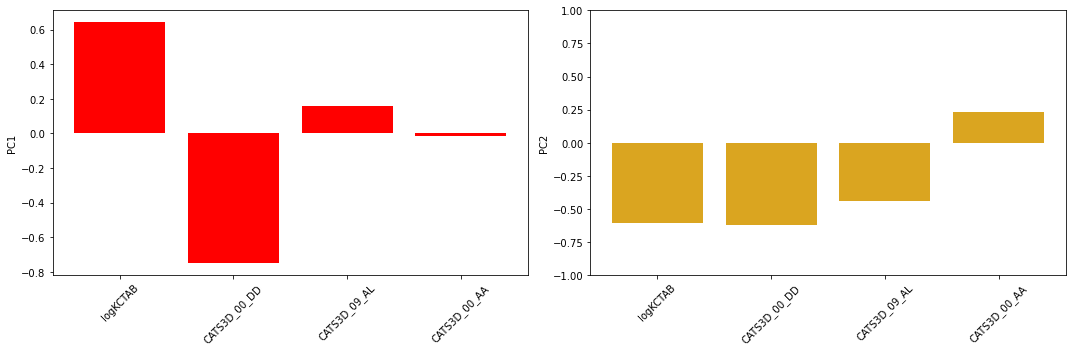

In [21]:
xlabels=list_of_columns

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(range(4), Pt['PC1'], align='center',color='red')
ax[1].bar(range(4), Pt['PC2'], align='center',color='goldenrod')


ax[0].set_ylabel('PC1')
ax[1].set_ylabel('PC2')


ax[0].set_xticks(range(4))
ax[1].set_xticks(range(4))


ax[0].set_xticklabels(xlabels, rotation=45)
ax[1].set_xticklabels(xlabels, rotation=45)


plt.ylim([-1,1])
plt.tight_layout()

In [22]:
macierz_korelacji

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logKCTAB,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.135951,0.290864,0.326375,1.000000
